<a href="https://colab.research.google.com/github/sh1mz9/DEEP_AR_PREDICTION/blob/main/Zenatix_AC_Data_Analysis_Forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#!pip install --upgrade mxnet-cu101==1.6.0.post0
!pip install --upgrade mxnet==1.6.0
!pip install gluonts

     |████████████████████████████████| 68.7 MB 30 kB/s 
  Attempting uninstall: graphviz
    Found existing installation: graphviz 0.10.1
    Uninstalling graphviz-0.10.1:
      Successfully uninstalled graphviz-0.10.1
     |████████████████████████████████| 2.1 MB 4.1 MB/s 
     |████████████████████████████████| 10.1 MB 19.9 MB/s 
  Attempting uninstall: typing-extensions
    Found existing installation: typing-extensions 3.7.4.3
    Uninstalling typing-extensions-3.7.4.3:
      Successfully uninstalled typing-extensions-3.7.4.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.6.0 requires typing-extensions~=3.7.4, but you have typing-extensions 3.10.0.2 which is incompatible.


In [2]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

from gluonts.model.deepar import DeepAREstimator
from gluonts.mx.trainer import Trainer
import numpy as np

mpl.rcParams['figure.figsize'] = (10, 8)
mpl.rcParams['axes.grid'] = False

/usr/local/lib/python3.7/dist-packages/gluonts/json.py:46: UserWarning: Using `json`-module for json-handling. Consider installing one of `orjson`, `ujson` to speed up serialization and deserialization.
  "Using `json`-module for json-handling. "


In [3]:
df=pd.read_csv('/content/AC_Data (1).csv',index_col=0,parse_dates=True,dayfirst=True)

In [4]:

df=df.dropna()

In [5]:
df.columns

Index(['AC 1', 'AC 2', 'AC 3', 'AC 4', 'AC 5', 'AC 6', 'AC 7', 'AC 8', 'AC 9',
       'AC 10', 'AC 11', 'AC 12', 'AC 13', 'AC 14', 'AC 15', 'AC 16', 'AC 17',
       'AC 18'],
      dtype='object')

PLOTTING FOR COMPLETE DATA

In [129]:
df

,AC 1,AC 2,AC 3,AC 4,AC 5,AC 6,AC 7,AC 8,AC 9,AC 10,AC 11,AC 12,AC 13,AC 14,AC 15,AC 16,AC 17,AC 18
Date,,,,,,,,,,,,,,,,,,
2019-08-01 00:00:00,7.518632,8.788315,0.000000,0.000000,2.617045,4.079041,2.782276,4.624447,5.222060,2.151238,1.585072,0.560373,3.142941,2.749470,5.417774,4.113460,3.305072,6.735981
2019-08-01 00:02:00,7.426114,8.940615,0.000000,0.000000,2.581625,3.781231,2.529366,5.057423,5.349465,2.414715,2.168184,1.818730,3.085110,2.720484,3.302422,3.986483,3.220588,6.379500
2019-08-01 00:04:00,7.052986,9.161103,0.000000,0.000000,2.592095,3.800127,2.332304,6.322521,3.995392,2.237114,3.345624,2.310409,3.132799,2.676861,3.539026,3.797881,3.131560,6.363475
2019-08-01 00:06:00,6.665446,9.065626,0.000000,0.000000,2.575639,3.772891,2.596200,5.805132,3.553778,1.878356,2.737645,2.510972,3.090007,2.666604,4.607439,3.062610,3.063953,6.127366
2019-08-01 00:08:00,6.674838,9.096130,0.000000,0.000000,2.021472,3.155697,2.845417,6.315060,3.042244,1.914650,2.452500,2.171791,3.097202,2.710572,5.332696,2.640150,2.864680,5.662474
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-09-30 23:51:00,0.000000,6.089533,2.322677,1.422932,0.000000,0.000000,3.729901,3.747301,3.578350,1.714157,5.146438,3.253012,2.464426,2.829701,3.693877,1.992432,3.029462,7.202612
2019-09-30 23:53:00,0.000000,6.046765,2.195754,1.861175,0.813454,0.000000,3.666080,3.017628,3.600397,1.547953,4.379771,3.144666,3.045807,2.693068,4.090679,1.944854,3.048858,7.348333
2019-09-30 23:55:00,0.000000,6.122385,2.192198,2.083315,1.046250,0.000000,3.668421,3.006311,3.614301,1.860847,5.019769,3.154221,3.648026,2.439526,4.062719,1.854352,3.027539,7.259989


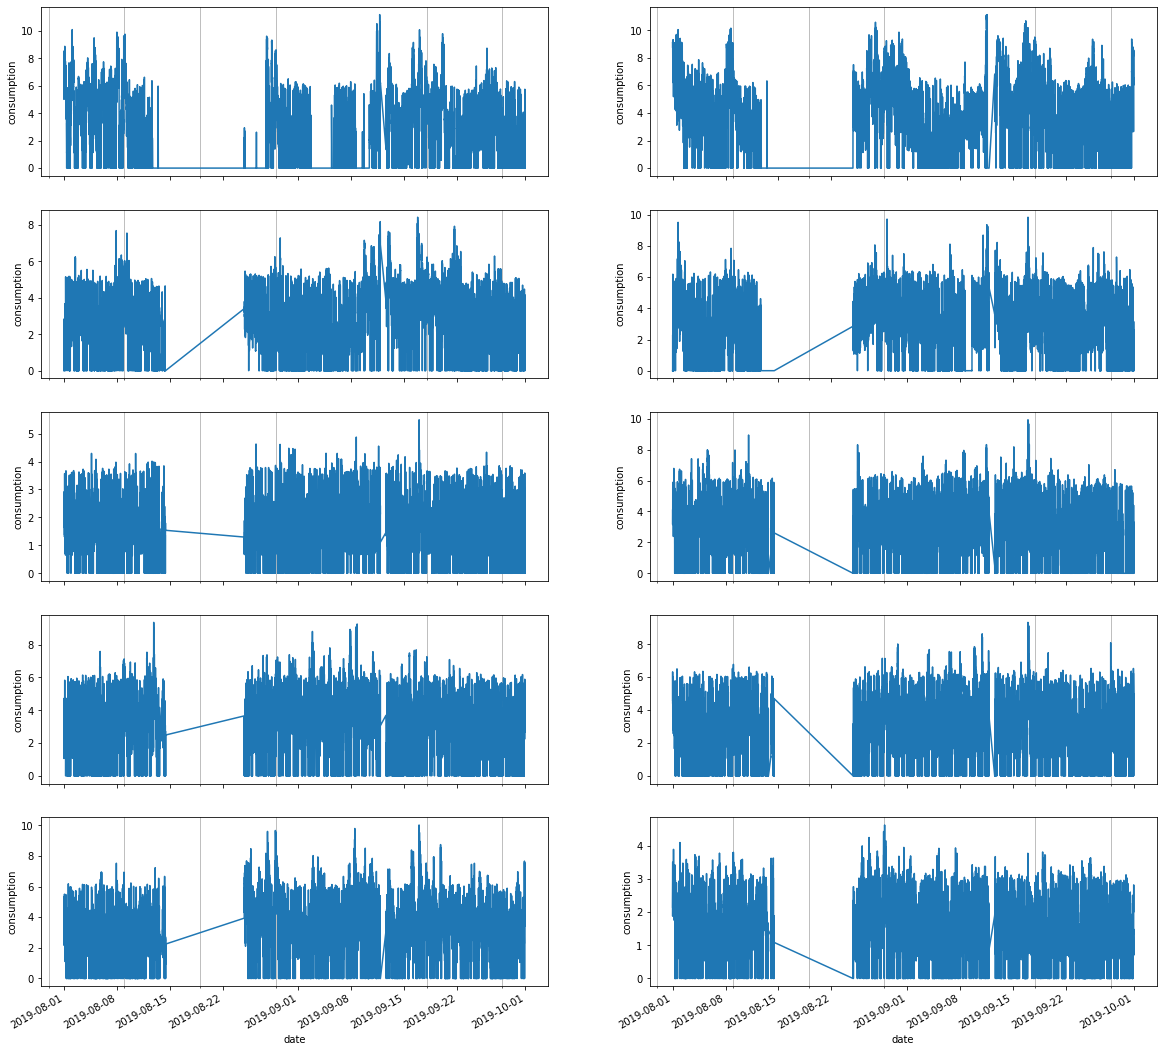

In [7]:
fig, axs = plt.subplots(5, 2, figsize=(20, 20), sharex=True)
axx = axs.ravel()
for i in range(0, 10):
    df[df.columns[i]].loc["2019-08-01":"2019-09-30"].plot(ax=axx[i])
    axx[i].set_xlabel("date")    
    axx[i].set_ylabel("consumption")   
    axx[i].grid(which='minor', axis='x')

In [8]:
#df.tail(644)

UNDERSTANDING DAILY USAGE


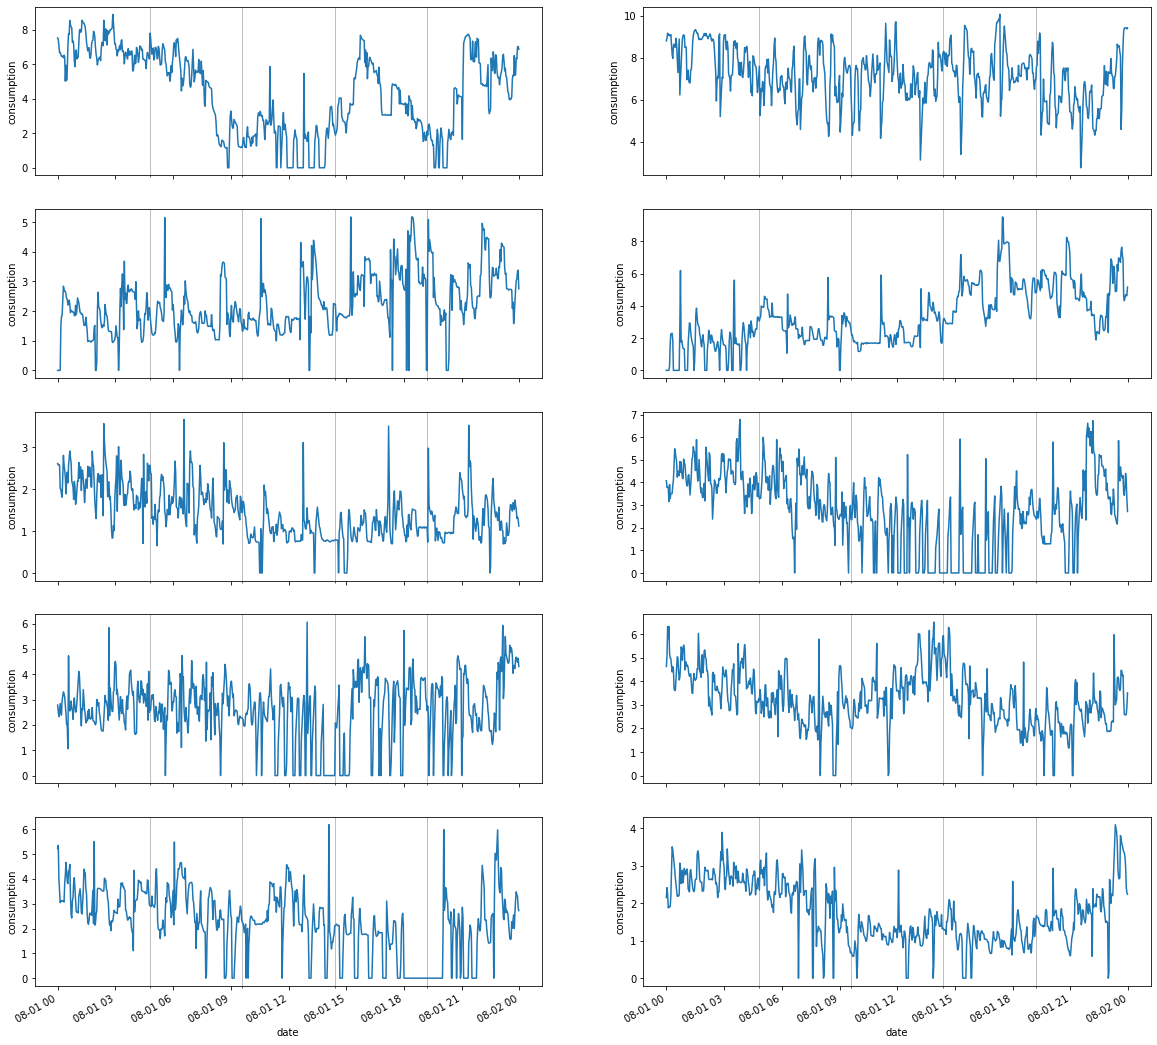

In [9]:
fig, axs = plt.subplots(5, 2, figsize=(20, 20), sharex=True)
axx = axs.ravel()
for i in range(10):
    df[df.columns[i]].loc["2019-08-01":"2019-08-01"].plot(ax=axx[i])
    axx[i].set_xlabel("date")    
    axx[i].set_ylabel("consumption")   
    axx[i].grid(which='minor', axis='x')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd8fb845850>,
      dtype=object)

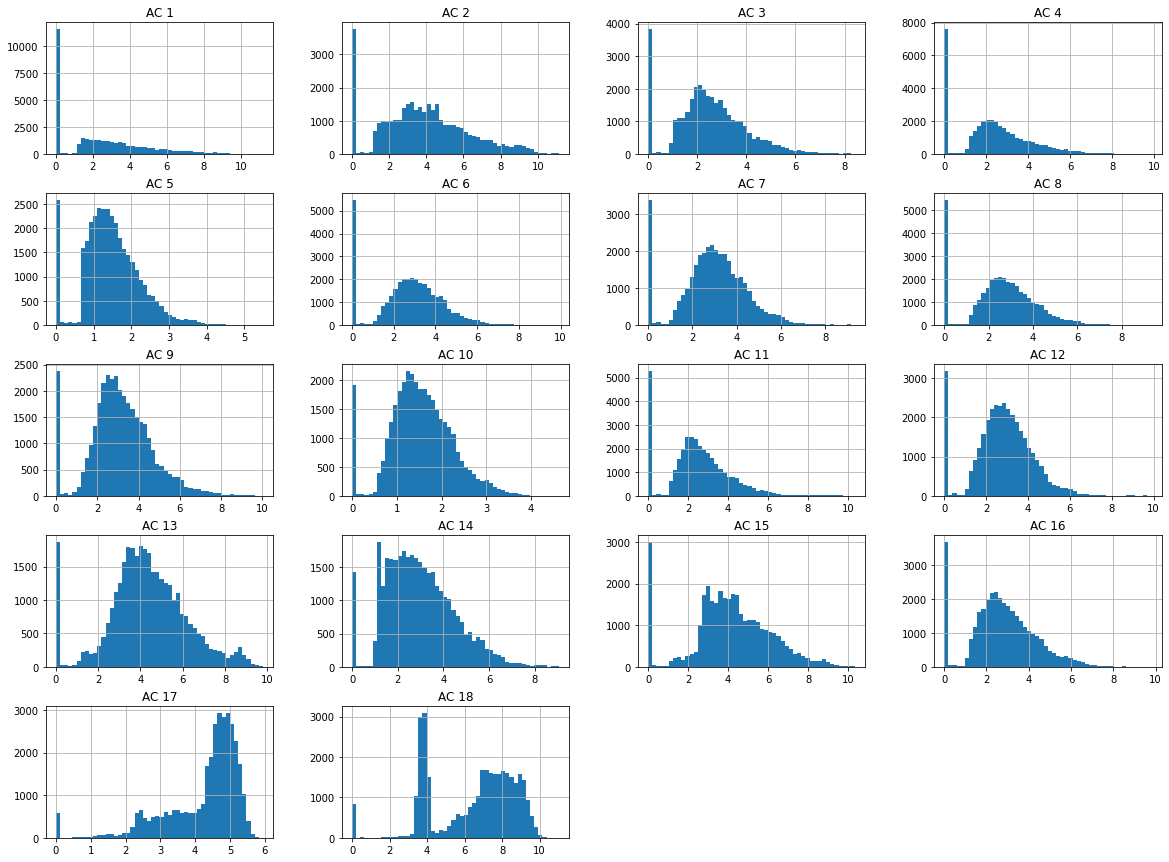

In [10]:
df.hist(bins=50,figsize=(20,15)) # understanding with histograph

In [11]:
dataset = pd.read_csv('/content/AC_Data.csv',parse_dates=True,dayfirst=True) ##taking new instance to get accurate date-time analysis


In [12]:
dataset.columns

Index(['Unnamed: 0', 'Date', 'AC 1', 'AC 2', 'AC 3', 'AC 4', 'AC 5', 'AC 6',
       'AC 7', 'AC 8', 'AC 9', 'AC 10', 'AC 11', 'AC 12', 'AC 13', 'AC 14',
       'AC 15', 'AC 16', 'AC 17', 'AC 18'],
      dtype='object')

In [13]:
dataset["Month"] = pd.to_datetime(dataset["Date"],dayfirst=True).dt.month
dataset["Year"] = pd.to_datetime(dataset["Date"],dayfirst=True).dt.year
dataset["Date"] = pd.to_datetime(dataset["Date"],dayfirst=True).dt.date
dataset["Time"] = pd.to_datetime(dataset["Date"],dayfirst=True).dt.time   
dataset["Week"] = pd.to_datetime(dataset["Date"],dayfirst=True).dt.week
dataset["Day"] = pd.to_datetime(dataset["Date"],dayfirst=True).dt.day_name()
#dataset = df.set_index("0")
#dataset.index = pd.to_datetime(dataset.index)
#dataset.head(1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  """


In [14]:
dataset

,Unnamed: 0,Date,AC 1,AC 2,AC 3,AC 4,AC 5,AC 6,AC 7,AC 8,AC 9,AC 10,AC 11,AC 12,AC 13,AC 14,AC 15,AC 16,AC 17,AC 18,Month,Year,Time,Week,Day
0,0,2019-08-01,7.518632,8.788315,0.000000,0.000000,2.617045,4.079041,2.782276,4.624447,5.222060,2.151238,1.585072,0.560373,3.142941,2.749470,5.417774,4.113460,3.305072,6.735981,8,2019,00:00:00,31,Thursday
1,1,2019-08-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8,2019,00:00:00,31,Thursday
2,2,2019-08-01,7.426114,8.940615,0.000000,0.000000,2.581625,3.781231,2.529366,5.057423,5.349465,2.414715,2.168184,1.818730,3.085110,2.720484,3.302422,3.986483,3.220588,6.379500,8,2019,00:00:00,31,Thursday
3,3,2019-08-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8,2019,00:00:00,31,Thursday
4,4,2019-08-01,7.052986,9.161103,0.000000,0.000000,2.592095,3.800127,2.332304,6.322521,3.995392,2.237114,3.345624,2.310409,3.132799,2.676861,3.539026,3.797881,3.131560,6.363475,8,2019,00:00:00,31,Thursday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87835,87835,2019-09-30,0.000000,6.122385,2.192198,2.083315,1.046250,0.000000,3.668421,3.006311,3.614301,1.860847,5.019769,3.154221,3.648026,2.439526,4.062719,1.854352,3.027539,7.259989,9,2019,00:00:00,40,Monday
87836,87836,2019-09-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9,2019,00:00:00,40,Monday
87837,87837,2019-09-30,1.209176,6.152532,2.211421,0.000000,1.448103,0.000000,3.151248,2.871690,3.417942,2.185493,5.174168,2.772349,3.786657,2.060023,4.057525,1.870886,2.991946,7.134647,9,2019,00:00:00,40,Monday
87838,87838,2019-09-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9,2019,00:00:00,40,Monday


In [159]:
dataset=dataset.dropna()

In [16]:
import seaborn as sns

No handles with labels found to put in legend.


Text(0.5, 1.0, 'Daily Analysis')

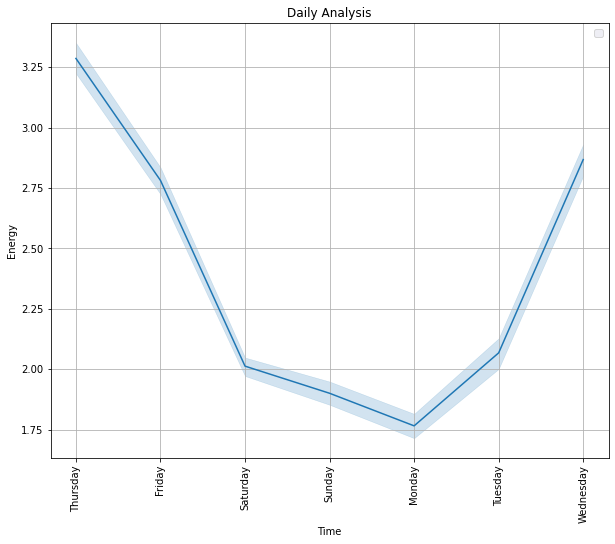

In [17]:
from matplotlib import style

fig = plt.figure()
ax1 = plt.subplot2grid((1,1), (0,0))

style.use('ggplot')

sns.lineplot(x=dataset["Day"], y=dataset["AC 1"], data=df)##further analysis for rest of AC's can be done
sns.set(rc={'figure.figsize':(15,6)})

plt.title("Energy consumption Daily")
plt.xlabel("Time")
plt.ylabel("Energy")
plt.grid(True)
plt.legend()

for label in ax1.xaxis.get_ticklabels():
    label.set_rotation(90)


plt.title("Daily Analysis")

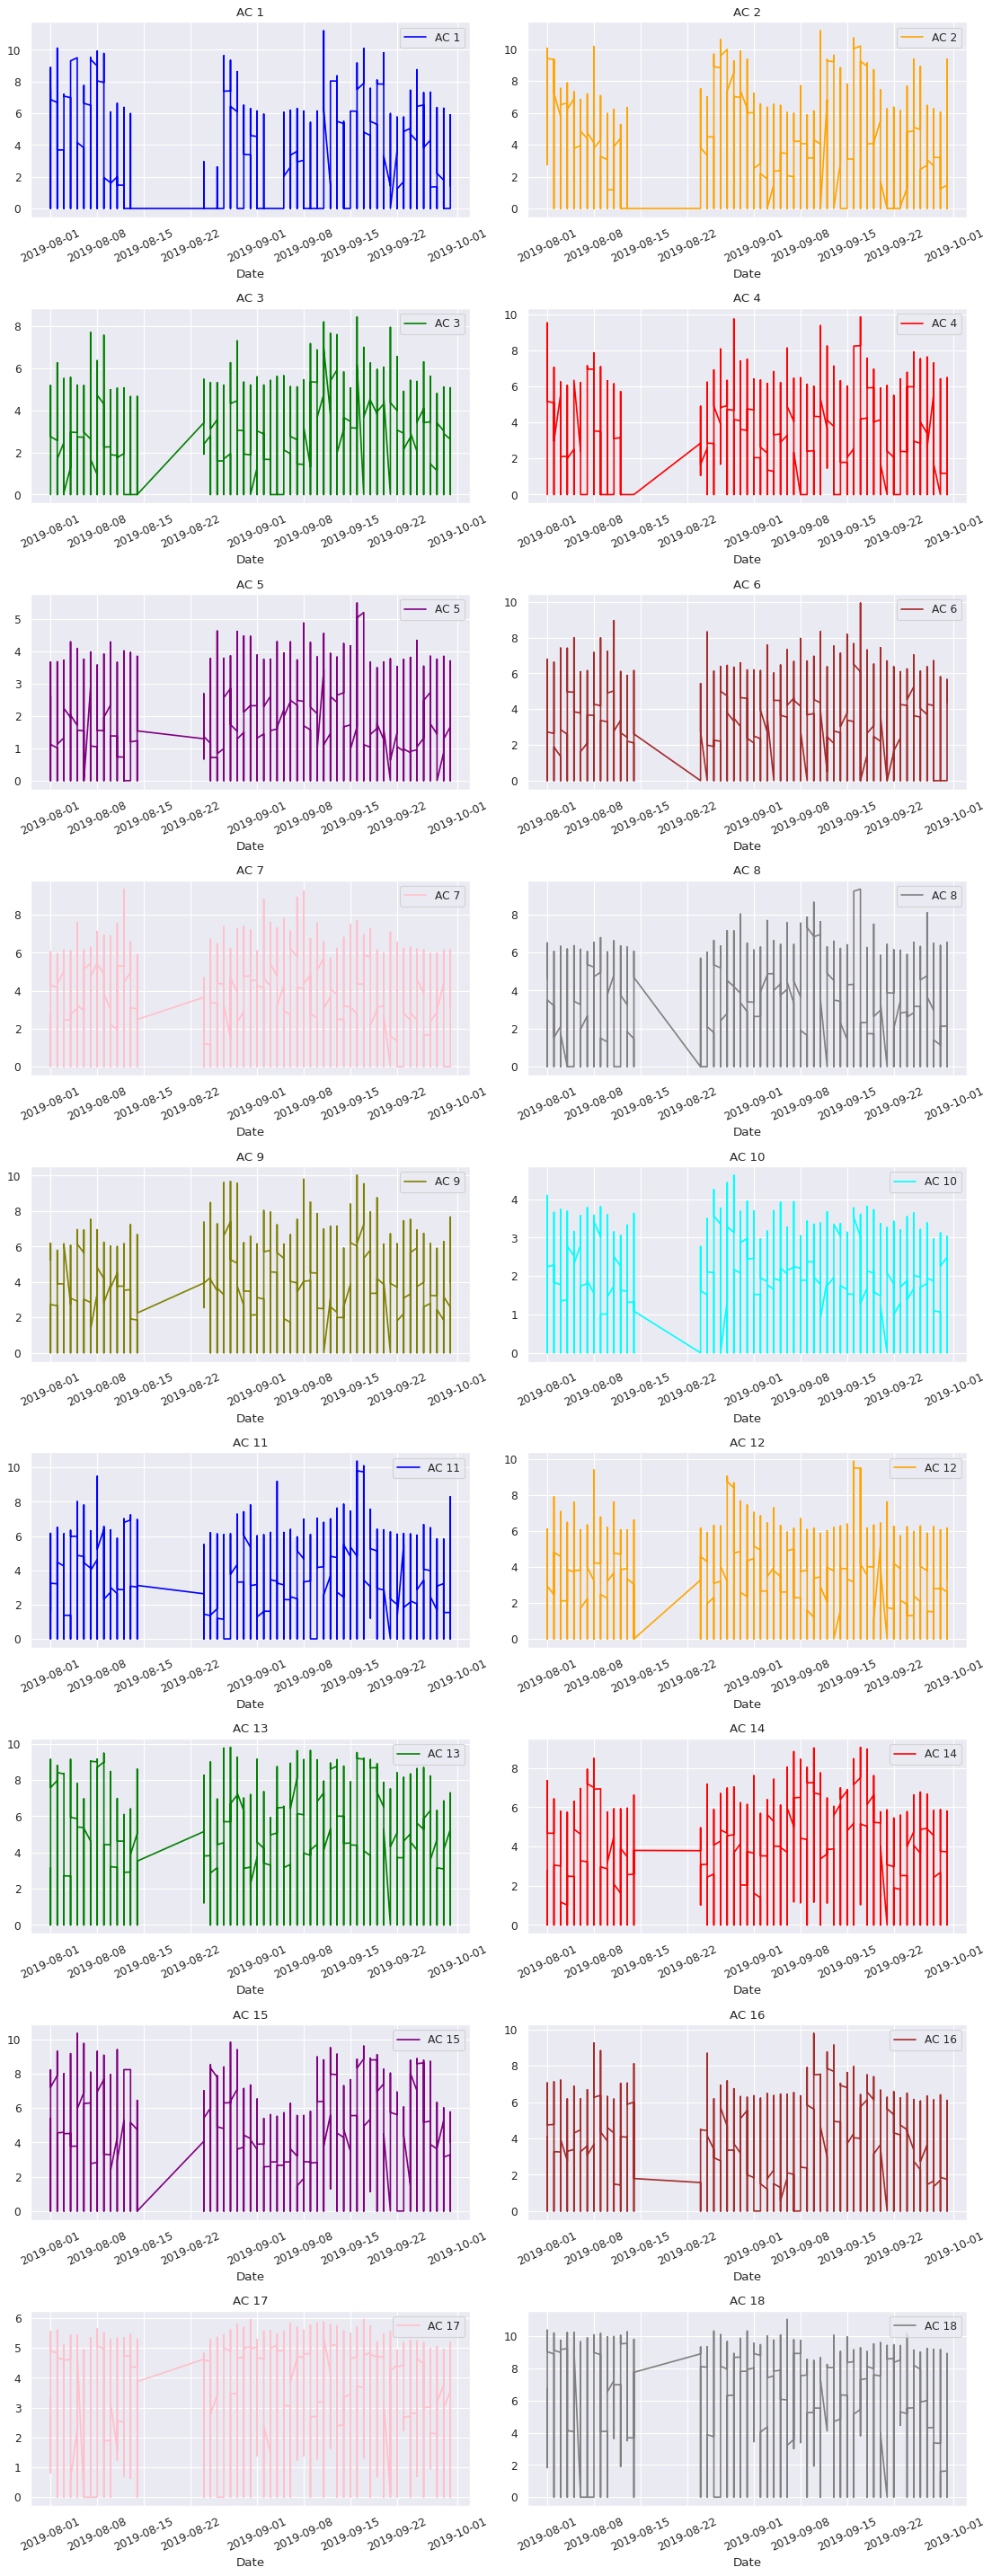

In [160]:
color_list = [
    "blue",
    "orange",
    "green",
    "red",
    "purple",
    "brown",
    "pink",
    "gray",
    "olive",
    "cyan",
]

date_key = "Date"


def Visualize(data):
    time_data = data[date_key]
    features= list(df.select_dtypes(include=[np.number]).columns.values)
    feature_size=len(features)
    fig, axes = plt.subplots(
        nrows=int(np.ceil(feature_size/2)), ncols=2, figsize=(14, feature_size*2), dpi=80, facecolor="w", edgecolor="k"
    )
    for i in range(feature_size):
        key = features[i]
        c = color_list[i % (len(color_list))]
        t_data = data[key]
        t_data.index = time_data
        t_data.head()
        ax = t_data.plot(
            ax=axes[i // 2, i % 2],
            color=c,
            title="{}".format(key),
            rot=25,
        )
        ax.legend([key])
    plt.tight_layout()


Visualize(dataset)

In [19]:
NewDataSet = df.resample('D').mean()  #resampling due to unavailibilty of GPU

In [20]:
print("Old Dataset ",df.shape )
print("New  Dataset ",NewDataSet.shape )

Old Dataset  (34642, 18)
New  Dataset  (61, 18)


In [47]:
TestData = NewDataSet.tail(10)

Training_Set = NewDataSet.iloc[:,0:1]

Training_Set = Training_Set[0:50]

In [48]:

TestData

,AC 1,AC 2,AC 3,AC 4,AC 5,AC 6,AC 7,AC 8,AC 9,AC 10,AC 11,AC 12,AC 13,AC 14,AC 15,AC 16,AC 17,AC 18
Date,,,,,,,,,,,,,,,,,,
2019-09-21,1.623034,1.475046,3.776078,1.876554,1.536744,2.533103,3.107089,2.853431,2.966651,1.294411,1.538088,3.156798,4.087153,2.572745,3.757914,2.360321,4.270658,6.625627
2019-09-22,1.017297,0.987400,3.227723,1.238663,1.405048,1.498829,2.134092,2.322008,2.969357,1.499217,1.624818,2.953497,3.585161,1.844603,3.026272,3.077516,4.400122,8.370055
2019-09-23,2.153794,0.616763,1.474213,0.895211,1.165901,1.764126,1.801553,2.219654,3.137234,1.255385,1.305544,2.626630,4.191234,2.127823,2.478216,2.765176,4.471881,7.810264
2019-09-24,2.760220,4.025646,2.368542,2.438930,1.258156,2.834765,2.247119,2.618974,3.277564,1.213034,1.462756,1.615647,4.499227,2.377385,3.295666,3.062180,4.111241,5.354453
2019-09-25,3.080436,4.714310,2.599887,2.867322,1.441223,2.718873,2.698568,2.083169,2.695321,1.638052,1.885170,2.431494,4.829210,2.637049,4.560147,2.476734,4.443469,6.573445
2019-09-26,3.490592,4.155844,2.652966,3.373638,1.445097,2.304000,2.055185,2.277400,2.915035,1.452648,3.167195,2.497959,4.916171,2.814585,4.487704,2.571598,4.336147,6.384675
2019-09-27,2.294675,3.274392,1.655617,2.620410,0.889503,2.359678,2.287638,2.882080,2.422662,1.258148,2.441874,2.539662,4.238959,2.710761,3.959076,2.218024,4.264613,6.878913
2019-09-28,1.187629,3.231414,1.863808,1.524184,1.303908,2.180396,1.861190,2.326428,2.429706,1.292894,1.811321,2.286714,3.184629,2.718239,3.107385,2.419250,3.229049,4.223416
2019-09-29,1.131083,2.354209,2.293806,1.710065,1.016752,0.992243,1.865774,1.574313,2.643362,1.372532,1.919364,1.834290,3.131667,2.302067,2.770978,1.917859,3.440735,5.525946


In [85]:
Training_Set=Training_Set.dropna()

TRANING USING LSTM

In [86]:
 from sklearn.preprocessing import MinMaxScaler
#Training_Set = Training_Set.values()
sc = MinMaxScaler(feature_range=(0, 1))
Train = sc.fit_transform(Training_Set)

In [87]:
X_Train = []
Y_Train = []

# Range should be fromm 10 Values to END 
for i in range(10, Train.shape[0]):
    
    # X_Train 0-9 
    X_Train.append(Train[i-10:i])
    
    # Y Would be 10 th Value based on past 60 Values 
    Y_Train.append(Train[1])

# Convert into Numpy Array
X_Train = np.array(X_Train)
Y_Train = np.array(Y_Train)

print(X_Train.shape)
print(Y_Train.shape)

(31, 10, 1)
(31, 1)


In [88]:
# Shape should be Number of [Datapoints , Steps , 1 )
# we convert into 3-d Vector or #rd Dimesnsion
X_Train = np.reshape(X_Train, newshape=(X_Train.shape[0], X_Train.shape[1], 1))
X_Train,Y_Train

(array([[[0.86519354],
         [0.79578399],
         [0.64954343],
         [0.83535307],
         [0.71006308],
         [0.68045374],
         [0.68345223],
         [0.99678056],
         [0.69563393],
         [0.26195363]],
 
        [[0.79578399],
         [0.64954343],
         [0.83535307],
         [0.71006308],
         [0.68045374],
         [0.68345223],
         [0.99678056],
         [0.69563393],
         [0.26195363],
         [0.21022598]],
 
        [[0.64954343],
         [0.83535307],
         [0.71006308],
         [0.68045374],
         [0.68345223],
         [0.99678056],
         [0.69563393],
         [0.26195363],
         [0.21022598],
         [0.15325603]],
 
        [[0.83535307],
         [0.71006308],
         [0.68045374],
         [0.68345223],
         [0.99678056],
         [0.69563393],
         [0.26195363],
         [0.21022598],
         [0.15325603],
         [0.01561192]],
 
        [[0.71006308],
         [0.68045374],
         [0.68345223],

In [89]:
from keras.models import Sequential
from tensorflow.keras.layers import LSTM
from keras.layers import Activation, Dense,Dropout

In [90]:
X_Train.shape[1]

10

In [91]:
regressor = Sequential()

# Adding the first LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50,activation='relu',return_sequences = True, input_shape = (X_Train.shape[1], 1)))

# Adding a second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))

# Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))

# Adding a fourth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50))
# Adding the output layer
regressor.add(Dense(units = 1))

# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [92]:
regressor.fit(X_Train, Y_Train, epochs = 50)

Epoch 1/50
1/1 [==============================] - 6s 6s/step - loss: 0.6352
Epoch 2/50
1/1 [==============================] - 0s 37ms/step - loss: 0.6047
Epoch 3/50
1/1 [==============================] - 0s 38ms/step - loss: 0.5732
Epoch 4/50
1/1 [==============================] - 0s 39ms/step - loss: 0.5386
Epoch 5/50
1/1 [==============================] - 0s 42ms/step - loss: 0.4994
Epoch 6/50
1/1 [==============================] - 0s 36ms/step - loss: 0.4549
Epoch 7/50
1/1 [==============================] - 0s 54ms/step - loss: 0.4040
Epoch 8/50
1/1 [==============================] - 0s 41ms/step - loss: 0.3461
Epoch 9/50
1/1 [==============================] - 0s 39ms/step - loss: 0.2812
Epoch 10/50
1/1 [==============================] - 0s 40ms/step - loss: 0.2100
Epoch 11/50
1/1 [==============================] - 0s 52ms/step - loss: 0.1358
Epoch 12/50
1/1 [==============================] - 0s 46ms/step - loss: 0.0661
Epoch 13/50
1/1 [==============================] - 0s 36ms/step

In [93]:
TestData.head(10)

,AC 1,AC 2,AC 3,AC 4,AC 5,AC 6,AC 7,AC 8,AC 9,AC 10,AC 11,AC 12,AC 13,AC 14,AC 15,AC 16,AC 17,AC 18
Date,,,,,,,,,,,,,,,,,,
2019-09-21,1.623034,1.475046,3.776078,1.876554,1.536744,2.533103,3.107089,2.853431,2.966651,1.294411,1.538088,3.156798,4.087153,2.572745,3.757914,2.360321,4.270658,6.625627
2019-09-22,1.017297,0.987400,3.227723,1.238663,1.405048,1.498829,2.134092,2.322008,2.969357,1.499217,1.624818,2.953497,3.585161,1.844603,3.026272,3.077516,4.400122,8.370055
2019-09-23,2.153794,0.616763,1.474213,0.895211,1.165901,1.764126,1.801553,2.219654,3.137234,1.255385,1.305544,2.626630,4.191234,2.127823,2.478216,2.765176,4.471881,7.810264
2019-09-24,2.760220,4.025646,2.368542,2.438930,1.258156,2.834765,2.247119,2.618974,3.277564,1.213034,1.462756,1.615647,4.499227,2.377385,3.295666,3.062180,4.111241,5.354453
2019-09-25,3.080436,4.714310,2.599887,2.867322,1.441223,2.718873,2.698568,2.083169,2.695321,1.638052,1.885170,2.431494,4.829210,2.637049,4.560147,2.476734,4.443469,6.573445
2019-09-26,3.490592,4.155844,2.652966,3.373638,1.445097,2.304000,2.055185,2.277400,2.915035,1.452648,3.167195,2.497959,4.916171,2.814585,4.487704,2.571598,4.336147,6.384675
2019-09-27,2.294675,3.274392,1.655617,2.620410,0.889503,2.359678,2.287638,2.882080,2.422662,1.258148,2.441874,2.539662,4.238959,2.710761,3.959076,2.218024,4.264613,6.878913
2019-09-28,1.187629,3.231414,1.863808,1.524184,1.303908,2.180396,1.861190,2.326428,2.429706,1.292894,1.811321,2.286714,3.184629,2.718239,3.107385,2.419250,3.229049,4.223416
2019-09-29,1.131083,2.354209,2.293806,1.710065,1.016752,0.992243,1.865774,1.574313,2.643362,1.372532,1.919364,1.834290,3.131667,2.302067,2.770978,1.917859,3.440735,5.525946


In [94]:
Df_Total = pd.concat((NewDataSet, TestData), axis=0)

In [95]:
Df_Total

,AC 1,AC 2,AC 3,AC 4,AC 5,AC 6,AC 7,AC 8,AC 9,AC 10,AC 11,AC 12,AC 13,AC 14,AC 15,AC 16,AC 17,AC 18
Date,,,,,,,,,,,,,,,,,,
2019-08-01,4.337582,7.177304,2.260919,3.298957,1.447058,2.816120,2.598578,3.265541,2.263383,1.765017,1.799540,2.523653,4.686882,3.072964,4.295824,3.633255,4.636374,7.542156
2019-08-02,3.989603,5.016976,2.903850,3.162823,1.643523,2.350510,2.339527,1.485105,2.632626,1.771287,2.012994,2.789480,5.122339,2.346786,4.479664,3.444327,4.442713,7.776494
2019-08-03,3.256437,4.292511,2.928079,1.899305,1.372382,2.554702,3.189883,1.295413,2.759224,1.463500,2.189289,3.088307,4.812202,1.866917,4.471018,2.934208,4.378729,7.867809
2019-08-04,4.187979,4.440708,2.611558,1.563769,1.552072,3.604171,2.844323,1.589539,2.546824,1.720705,1.862474,3.073666,5.000264,2.243015,4.684968,2.930669,4.553434,8.361518
2019-08-05,3.559847,4.024156,1.779394,0.909971,1.674849,3.794200,2.486408,1.644122,2.596034,1.422346,3.367481,3.125061,4.169737,2.795059,5.003871,3.461541,3.808986,6.120251
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-09-26,3.490592,4.155844,2.652966,3.373638,1.445097,2.304000,2.055185,2.277400,2.915035,1.452648,3.167195,2.497959,4.916171,2.814585,4.487704,2.571598,4.336147,6.384675
2019-09-27,2.294675,3.274392,1.655617,2.620410,0.889503,2.359678,2.287638,2.882080,2.422662,1.258148,2.441874,2.539662,4.238959,2.710761,3.959076,2.218024,4.264613,6.878913
2019-09-28,1.187629,3.231414,1.863808,1.524184,1.303908,2.180396,1.861190,2.326428,2.429706,1.292894,1.811321,2.286714,3.184629,2.718239,3.107385,2.419250,3.229049,4.223416


In [96]:
inputs = Df_Total[len(Df_Total) - len(TestData) - 10:].values
inputs.shape

(20, 18)

In [97]:
inputs = Df_Total[len(Df_Total) - len(TestData) - 10:].values

# We need to Reshape
inputs = inputs.reshape(-1,1)

# Normalize the Dataset
inputs = sc.transform(inputs)

X_test = []
for i in range(10, 20):
    X_test.append(inputs[i-10:i])
    
# Convert into Numpy Array
X_test = np.array(X_test)

# Reshape before Passing to Network
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Pass to Model 
predicted_Consumption = regressor.predict(X_test)
predicted_Consumption = sc.inverse_transform(predicted_Consumption)

In [123]:
True_Value = TestData['AC 17']#.to_list
Predicted_Value  = predicted_Consumption
dates = TestData.index.to_list()


In [124]:

Machine_Df = pd.DataFrame(data={
    "Date":dates,
    "TrueValue": True_Value,
    "PredictedValue":[x[0] for x in Predicted_Value]
})


In [125]:

Machine_Df

,Date,TrueValue,PredictedValue
Date,,,
2019-09-21,2019-09-21,4.270658,3.764548
2019-09-22,2019-09-22,4.400122,3.799363
2019-09-23,2019-09-23,4.471881,3.843473
2019-09-24,2019-09-24,4.111241,3.781293
2019-09-25,2019-09-25,4.443469,3.809185
2019-09-26,2019-09-26,4.336147,3.858518
2019-09-27,2019-09-27,4.264613,3.865713
2019-09-28,2019-09-28,3.229049,3.848981
2019-09-29,2019-09-29,3.440735,3.849989


No handles with labels found to put in legend.


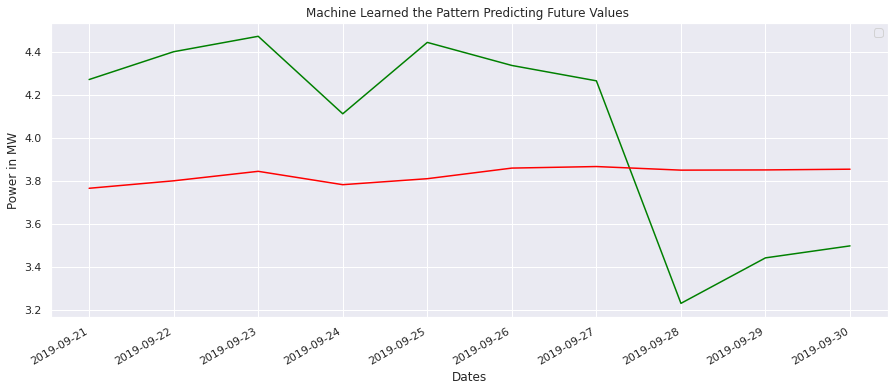

In [126]:
fig = plt.figure()

ax1= fig.add_subplot(111)

x = dates
y = True_Value

y1 = Predicted_Value

plt.plot(x,y, color="green")
plt.plot(x,y1, color="red")
# beautify the x-labels
plt.gcf().autofmt_xdate()
plt.xlabel('Dates')
plt.ylabel("Power in MW")
plt.title("Machine Learned the Pattern Predicting Future Values ")
plt.legend()

In [ ]:
#TRYING DEEP_AR FOR TRAINING

In [127]:
ts_code=df_input["index"].astype('category').cat.codes.values

In [128]:
ts_code

array([ 0, 10, 11, 12, 13, 14, 15, 16, 17,  1,  2,  3,  4,  5,  6,  7,  8,
        9], dtype=int8)

In [130]:
df_train=df_input.iloc[:,1:34000].values
df_test=df_input.iloc[:,34000:].values

In [131]:
df_train.shape

(18, 33999)

In [132]:
df_test.shape

(18, 643)

In [133]:
freq="1min"
start_train = pd.Timestamp("2019-08-01 00:00:00", freq=freq)
start_test = pd.Timestamp("2019-09-30 01:53:00", freq=freq)
prediction_lentgh=720 #1 days prediction

In [134]:
estimator = DeepAREstimator(freq=freq, 
                            context_length=720,
                            prediction_length=prediction_lentgh,
                            use_feat_static_cat=True,
                            cardinality=[1],
                            num_layers=2,
                            num_cells=32,
                            cell_type='lstm',
                            trainer=Trainer(epochs=5))

In [135]:
df_train[0:3]

array([[7.51863184, 7.42611426, 7.05298584, ..., 1.73950244, 0.        ,
        0.        ],
       [8.78831543, 8.94061523, 9.16110254, ..., 2.57332593, 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 2.77137183, 2.29255591,
        1.75800488]])

In [136]:
from gluonts.dataset.common import ListDataset
from gluonts.dataset.field_names import FieldName

train_ds = ListDataset([
    {
        FieldName.TARGET: target,
        FieldName.START: start_train,
        FieldName.FEAT_STATIC_CAT: fsc
    }
    for (target, fsc) in zip(df_train[0:3],
                             ts_code[0:3].reshape(-1,1))
], freq=freq)

test_ds = ListDataset([
    {
        FieldName.TARGET: target,
        FieldName.START: start_test,
        FieldName.FEAT_STATIC_CAT: fsc
    }
    for (target, fsc) in zip(df_test[0:3],
                            ts_code[0:3].reshape(-1,1))
], freq=freq)

In [137]:
next(iter(train_ds))

{'feat_static_cat': array([0], dtype=int32),
 'source': SourceContext(source='list_data', row=0),
 'start': Timestamp('2019-08-01 00:00:00', freq='T'),
 'target': array([7.518632 , 7.426114 , 7.0529857, ..., 1.7395024, 0.       ,
        0.       ], dtype=float32)}

In [138]:
predictor = estimator.train(training_data=train_ds)

100%|██████████| 50/50 [01:22<00:00,  1.65s/it, epoch=5/5, avg_epoch_loss=0.728]


In [139]:
from gluonts.evaluation.backtest import make_evaluation_predictions

In [175]:
forecast_it, ts_it = make_evaluation_predictions(
    dataset=test_ds,  
    predictor=predictor,  
    num_samples=600, 
)

In [177]:
forecasts=list(forecast_it)
tss=list(ts_it)

In [178]:
forecasts

[]

In [179]:
from tqdm.autonotebook import tqdm

print("Obtaining time series conditioning values ...")
tss = list(tqdm(ts_it, total=len(df_test)))
print("Obtaining time series predictions ...")
forecasts = list(tqdm(forecast_it, total=len(df_test)))

Obtaining time series conditioning values ...


  0%|          | 0/18 [00:00<?, ?it/s]

Obtaining time series predictions ...


  0%|          | 0/18 [00:00<?, ?it/s]

In [180]:

def plot_prob_forecasts(ts_entry, forecast_entry):
    plot_length = prediction_lentgh
    prediction_intervals = (80.0, 95.0)
    legend = ["observations", "median prediction"] + [f"{k}% prediction interval" for k in prediction_intervals][::-1]

    fig, ax = plt.subplots(1, 1, figsize=(10, 7))
    ts_entry[-plot_length:].plot(ax=ax)  
    forecast_entry.plot(prediction_intervals=prediction_intervals, color='g')
    plt.grid(which="both")
    plt.legend(legend, loc="upper left")
    plt.show()

In [181]:
for i in tqdm(range(2)):
    ts_entry = tss[i]
    forecast_entry = forecasts[i]
    plot_prob_forecasts(ts_entry, forecast_entry)

  0%|          | 0/2 [00:00<?, ?it/s]

IndexError: ignored

In [182]:
from gluonts.evaluation import Evaluator
evaluator = Evaluator(quantiles=[0.1, 0.5, 0.9])
agg_metrics, item_metrics = evaluator(iter(tss), iter(forecasts), num_series=len(df_test[0:18]))

Running evaluation:   0%|          | 0/18 [00:00<?, ?it/s]


AssertionError: ignored

In [183]:
item_metrics

NameError: ignored